In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = keras.datasets.cifar10.load_data()

# Normalize the dataset
train_X, test_X = train_X / 255.0, test_X / 255.0

# One-hot encode the labels
train_Y_one_hot = keras.utils.to_categorical(train_Y, 10)
test_Y_one_hot = keras.utils.to_categorical(test_Y, 10)

# Split validation set from training data
val_X, val_Y = train_X[45000:], train_Y_one_hot[45000:]
train_X, train_Y = train_X[:45000], train_Y_one_hot[:45000]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


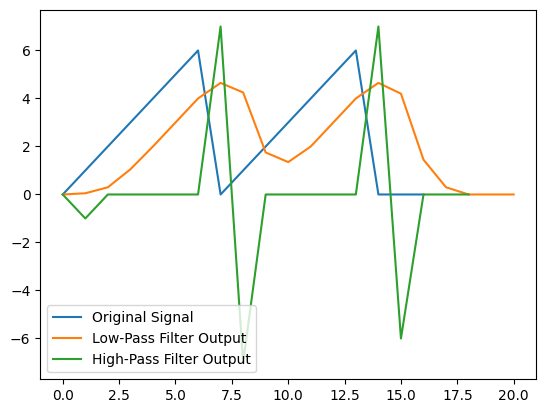

In [9]:
# A1: Convolution Exercise
X = [0,1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
H_L = [0.05,0.2,0.5,0.2,0.05]
H_H = [-1,2,-1]

y_low = np.convolve(X, H_L)
y_high = np.convolve(X, H_H)

plt.plot(X, label='Original Signal')
plt.plot(y_low, label='Low-Pass Filter Output')
plt.plot(y_high, label='High-Pass Filter Output')
plt.legend()
plt.show()

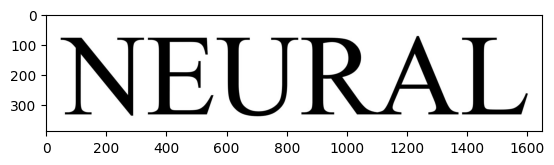

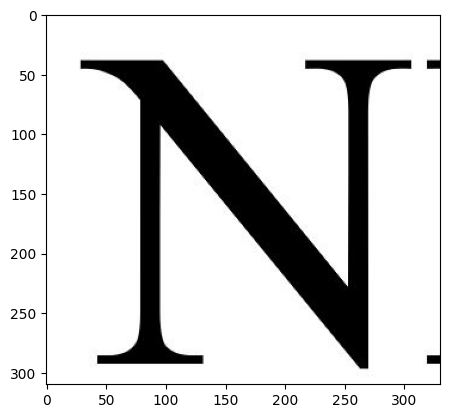

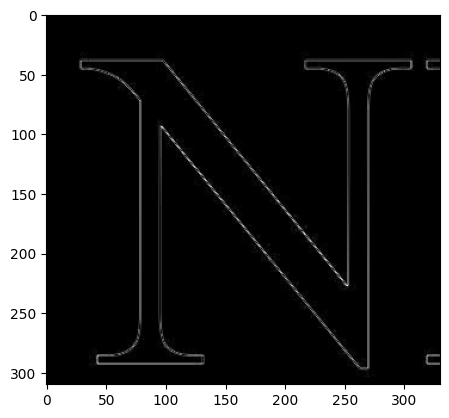

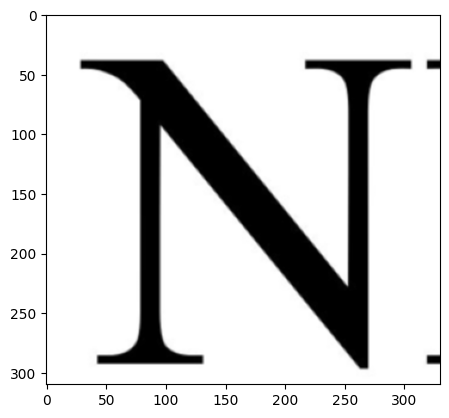

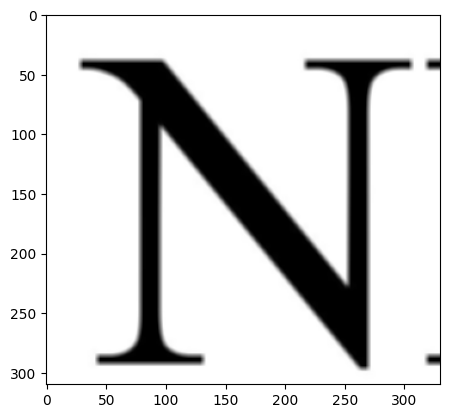

In [10]:
# A2: Image Convolution
im = imread("Neural.JPG")
img = rgb2gray(im) * 255
plt.imshow(img, cmap='gray')
plt.show()

# Cropping the image
img1 = img[40:350,20:350]
plt.imshow(img1, cmap='gray')
plt.show()

# Define filters
fil1 = np.array([[ 0, -1, 0], [-1, 4, -1], [ 0, -1, 0]])
fil2 = np.array([[ 0.2, 0.5, 0.2], [0.5, 1, 0.5], [0.2, 0.5, 0.2]])
fil3 = np.ones((5,5)) * 0.1

# Apply filters
grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

# Display filtered images
plt.imshow(abs(grad1), cmap='gray')
plt.show()
plt.imshow(grad2, cmap='gray')
plt.show()
plt.imshow(grad3, cmap='gray')
plt.show()

In [11]:
# A3: Fully Connected Network
fc_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
fc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
fc_history = fc_model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(val_X, val_Y))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.1936 - loss: 2.1993 - val_accuracy: 0.2718 - val_loss: 1.9649
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.2487 - loss: 2.0033 - val_accuracy: 0.3046 - val_loss: 1.9325
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.2660 - loss: 1.9561 - val_accuracy: 0.3358 - val_loss: 1.9128
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.2828 - loss: 1.9199 - val_accuracy: 0.3186 - val_loss: 1.9151
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.2931 - loss: 1.9145 - val_accuracy: 0.3268 - val_loss: 1.9298
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.2931 - loss: 1.9117 - val_accuracy: 0.3388 - val_loss: 1.8910
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.3077 - loss: 1.8811 - val_accuracy: 0.3306 - val_loss: 1.9237
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.3101 - loss: 1.8785 - 

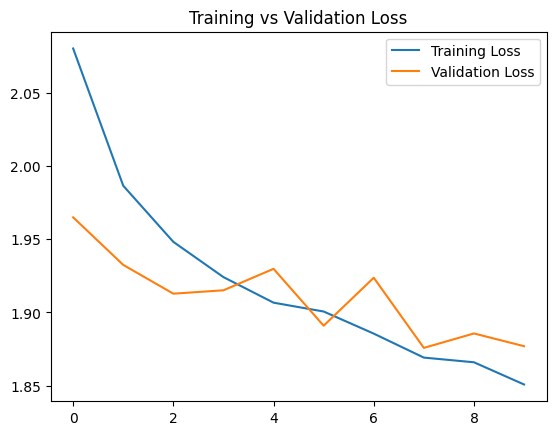

In [12]:
# A4: Plot Training & Validation Loss
plt.plot(fc_history.history['loss'], label='Training Loss')
plt.plot(fc_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [13]:
# A5: Test Model
test_score = fc_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(f'\nTest Accuracy: {test_score[1]:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3482 - loss: 1.8643

Test Accuracy: 0.3475
